    1. Import required libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

    2. Read the csv

In [2]:
raw_data = pd.read_csv("charcters_stats.csv")

check the data for inconsistancies

In [3]:
pd.options.display.max_rows = None # remove the default max rows to avoid truncation
raw_data[raw_data["Total"] == 5] # show all characters with minimum stats


,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
7,Adam Strange,good,1,1,1,1,0,1,5
8,Agent 13,good,1,1,1,1,0,1,5
13,Alex Woolsly,good,1,1,1,1,0,1,5
15,Allan Quatermain,good,1,1,1,1,0,1,5
17,Ammo,bad,1,1,1,1,0,1,5
18,Ando Masahashi,good,1,1,1,1,0,1,5
21,Angela,bad,1,1,1,1,0,1,5
27,Anti-Spawn,bad,1,1,1,1,0,1,5
33,Arachne,good,1,1,1,1,0,1,5
39,Arsenal,good,1,1,1,1,0,1,5


these stats make no sense. There are characters known for their intelligence, but with an intelligence of 1. There are characters with superspeed, but with a speed of 1. These rows should not be included in the analysis

In [4]:
df = raw_data.loc[raw_data["Total"] != 5] #copy the raw data into a new data frame except for the invalid rows

    3. Show the first record from the csv

In [5]:
df.iloc[[0]] #use iloc to show the first row of the dataframe

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
0,3-D Man,good,50,31,43,32,25,52,233


    4. Show the number of rows and columns

In [6]:
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns") #use shape to get the number of rows and columns and print them with a formated string

There are 434 rows and 9 columns


    5. Find the amount of characters who fall under each alignment, you can use value_counts()

In [7]:
df["Alignment"].value_counts()

good       299
bad        122
neutral     11
Name: Alignment, dtype: int64

    6. Find only the good alignment characters

In [8]:
good_characters = df.loc[df["Alignment"] == "good"] # use loc to grab all the characters with a good alighment

    7. Show only the first five records from the previous bullet point

In [9]:
good_characters.head() #use head to grab the first 5 rows

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
0,3-D Man,good,50,31,43,32,25,52,233
1,A-Bomb,good,38,100,17,80,17,64,316
2,Abe Sapien,good,88,14,35,42,35,85,299
3,Abin Sur,good,50,90,53,64,84,65,406
6,Adam Monroe,good,63,10,12,100,71,64,320


    8. Select the top five heroes with the highest speed who have a good alignment

In [10]:
good_characters.nlargest(5, "Speed") #use nlargest to grab 5 characters with the highest speed

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
85,Black Bolt,good,75,67,100,84,100,56,482
229,Flash I,good,63,10,100,50,57,32,312
230,Flash II,good,63,10,100,60,66,32,331
231,Flash III,good,63,10,100,60,83,32,348
232,Flash IV,good,63,10,100,32,59,48,312


    9. Select five heroes with maximum power who have a good alignment

In [11]:
good_characters.nlargest(5, "Power") #use nlargest to grab 5 characters with the highest power

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
69,Beta Ray Bill,good,63,80,35,95,100,84,457
70,Beyonder,good,88,100,23,100,100,56,467
85,Black Bolt,good,75,67,100,84,100,56,482
129,Cable,good,88,48,23,56,100,80,395
185,Deadman,good,50,10,33,100,100,42,335


    10. Find out how many superheroes there are with power of 100 with good alignment

In [12]:
goodCharacters_p100 = good_characters.loc[good_characters["Power"] == 100] #use len to get the number of good characters with 100 power
print(f"there are {len(goodCharacters_p100)} good characters with 100 Power")

there are 33 good characters with 100 Power


    11. Shape them what you got in point 10

In [13]:
#use shape to grab the number of good characters with a power of 100
print(f"there are {goodCharacters_p100.shape[0]} good characters with 100 Power")

there are 33 good characters with 100 Power


    12. Show all records from point 10

In [14]:
goodCharacters_p100

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
69,Beta Ray Bill,good,63,80,35,95,100,84,457
70,Beyonder,good,88,100,23,100,100,56,467
85,Black Bolt,good,75,67,100,84,100,56,482
129,Cable,good,88,48,23,56,100,80,395
185,Deadman,good,50,10,33,100,100,42,335
196,Doctor Fate,good,81,16,25,80,100,50,352
198,Doctor Strange,good,100,10,12,84,100,60,366
204,Dr Manhattan,good,88,32,42,95,100,42,399
226,Firestorm,good,50,53,58,56,100,42,359
251,Goku,good,56,100,75,90,100,100,521


    13. Retrieve the first five records with max power and has good alignment

In [15]:
goodCharacters_p100.head()

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
69,Beta Ray Bill,good,63,80,35,95,100,84,457
70,Beyonder,good,88,100,23,100,100,56,467
85,Black Bolt,good,75,67,100,84,100,56,482
129,Cable,good,88,48,23,56,100,80,395
185,Deadman,good,50,10,33,100,100,42,335


    14. Draw a bar plot of all superheroes who are having good alignment and a max power of the top five heroes only , take the same object of point 13, show name and total in plot with green bars

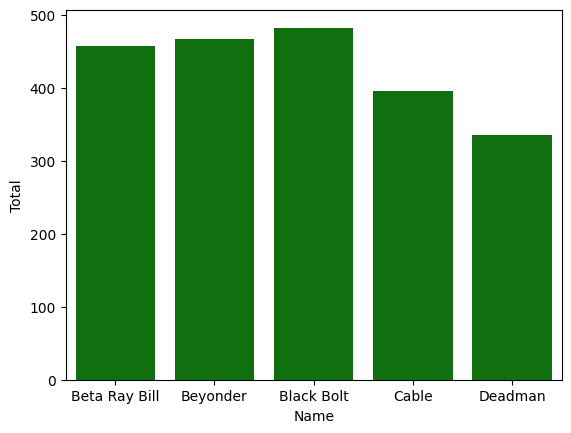

In [16]:
#use seaborn to show the value of the total column in the first 5 rows of the max power good dataframe
sns.barplot(data=goodCharacters_p100.head(5), x="Name", y="Total", color="green")
plt.show()

    15. Extract villains who having a bad alignment

In [17]:
villains = df.loc[df["Alignment"] == "bad"] #use loc to grab all the characters with bad alignment

    16. Show first five records of point 15

In [18]:
villains.head()

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
4,Abomination,bad,63,80,53,90,55,95,436
5,Abraxas,bad,88,100,83,99,100,56,526
11,Air-Walker,bad,50,85,100,85,100,40,460
16,Amazo,bad,75,100,100,100,100,100,575
23,Annihilus,bad,75,80,47,56,59,64,381


    17. Show top five fastest super villains in terms of super speed

In [19]:
villains.nlargest(5, "Speed")

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
11,Air-Walker,bad,50,85,100,85,100,40,460
16,Amazo,bad,75,100,100,100,100,100,575
535,Superboy-Prime,bad,94,100,100,100,100,85,579
610,Zoom,bad,50,10,100,28,72,28,288
242,General Zod,bad,94,100,96,100,94,95,579


    18. Top five super villains in terms of intelligence

In [20]:
villains.nlargest(5, "Intelligence")

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
386,Mister Mxyzptlk,bad,113,10,12,14,100,28,277
29,Apocalypse,bad,100,100,33,100,100,60,493
122,Brainiac,bad,100,28,63,90,60,75,416
194,Doctor Doom,bad,100,32,20,100,93,84,429
315,Joker,bad,100,10,12,56,22,90,290


    19. Show who is most dangerous super villain after calculating their total (top 5 only)

In [21]:
villains.nlargest(1, "Total")

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
242,General Zod,bad,94,100,96,100,94,95,579


    20. Draw a histogram for speed of super heroes having fig size 10.5, provide speed in histogram for only good alignment superheroes, title should be "distribution of speed", xlabel should be "speed"

<Axes: xlabel='Speed', ylabel='Count'>

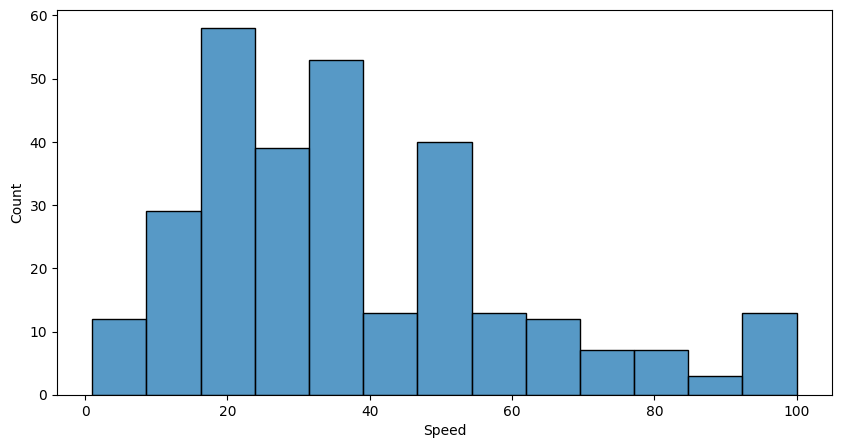

In [22]:
#create a plot with the size 10, 5
plt.subplots(figsize=(10, 5))

#show a histplot of the good characters speed stat
sns.histplot(data=good_characters, x="Speed")

    21. Draw a histogram for combat of super villains having fig size 10.5, provide combat in histogram for only bad alignment superheroes, title should be "distribution of combat", xlabel should be "combat"

<Axes: xlabel='Combat', ylabel='Count'>

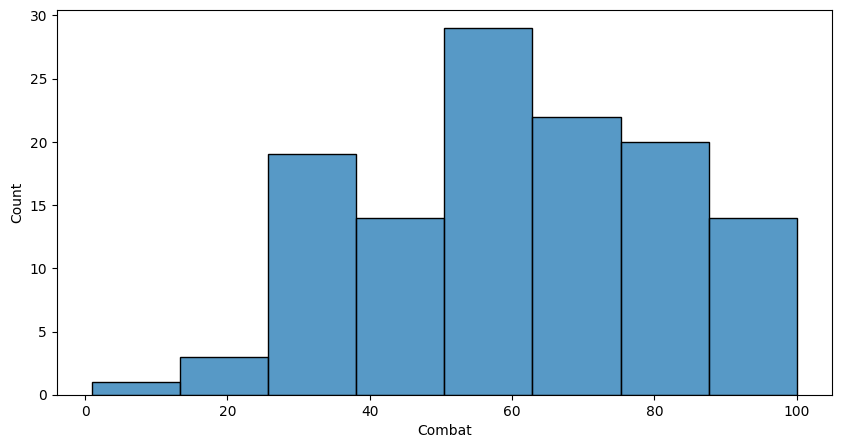

In [23]:
#create a plot with the size 10, 5
plt.subplots(figsize=(10, 5))

#create a hist plot with the bad characters combat stat
sns.histplot(data=villains, x="Combat")

    23. Bonus: You can go beyond the scope and extract different information on different characters and their properties. As well as draw some more plots and histograms.

In [24]:
#create new dataframes without the total column
df_sans_total = df.drop(labels="Total", axis=1)
good_sans_total = good_characters.drop(labels="Total", axis=1)
villains_sans_total = villains.drop(labels="Total", axis=1)

<Axes: >

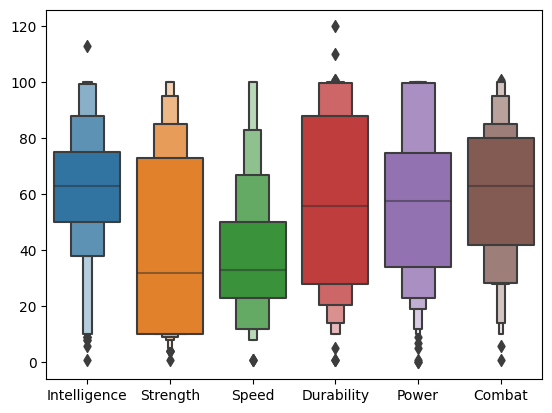

In [25]:
sns.boxenplot(data=df_sans_total) #create a boxen plot of all the characters

<Axes: >

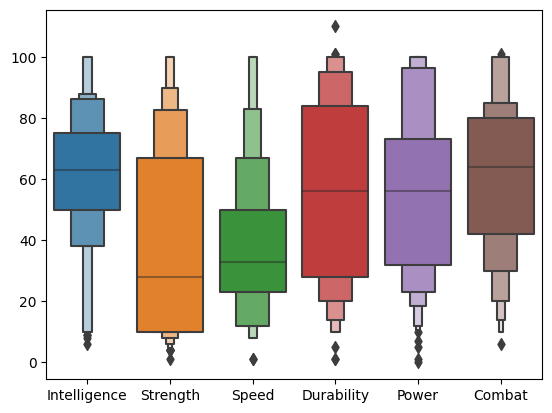

In [26]:
sns.boxenplot(data=good_sans_total) #create a boxen plot of the super heros

<Axes: >

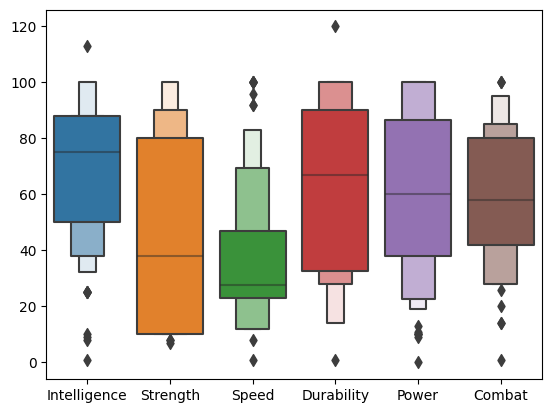

In [27]:
sns.boxenplot(data=villains_sans_total) #create a boxen plot of the villians

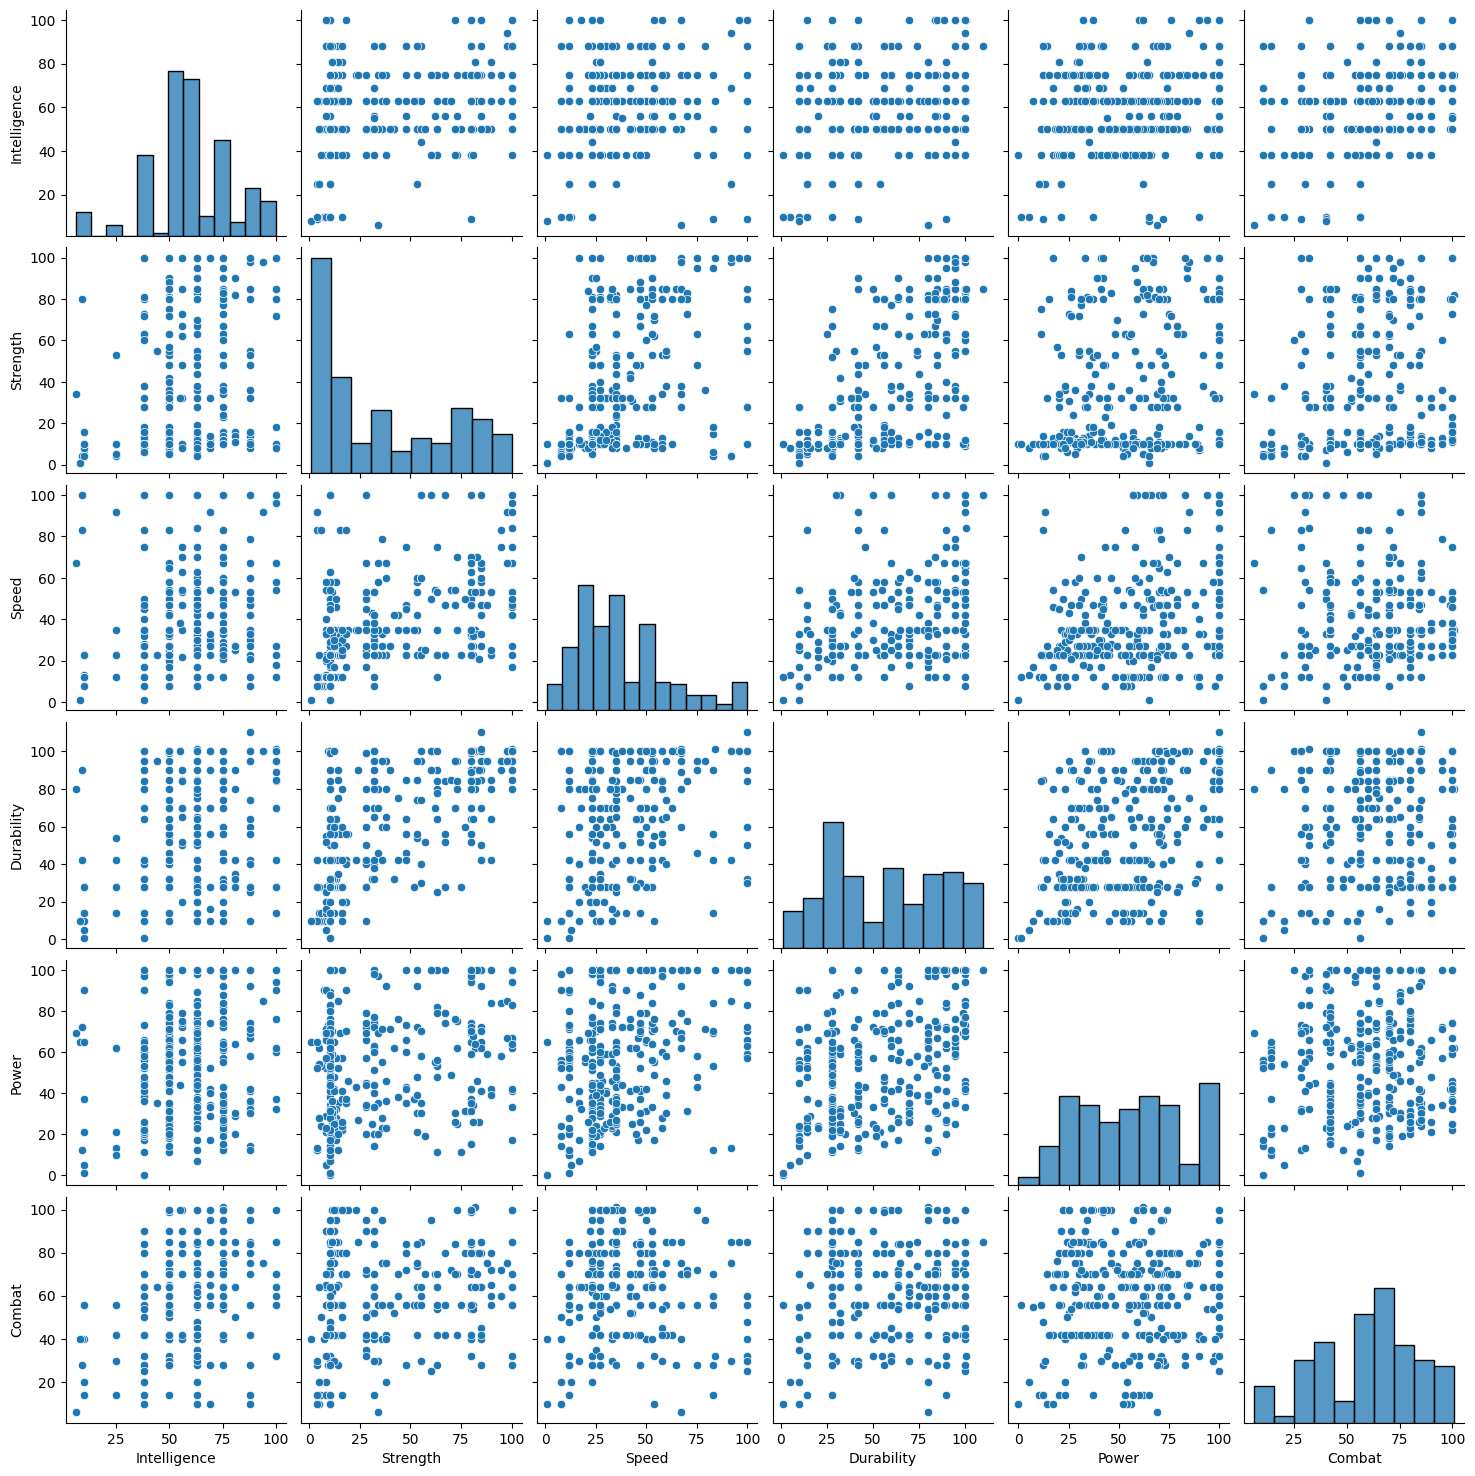

In [28]:
sns.pairplot(data=good_sans_total) #create a pairplot of the good characters

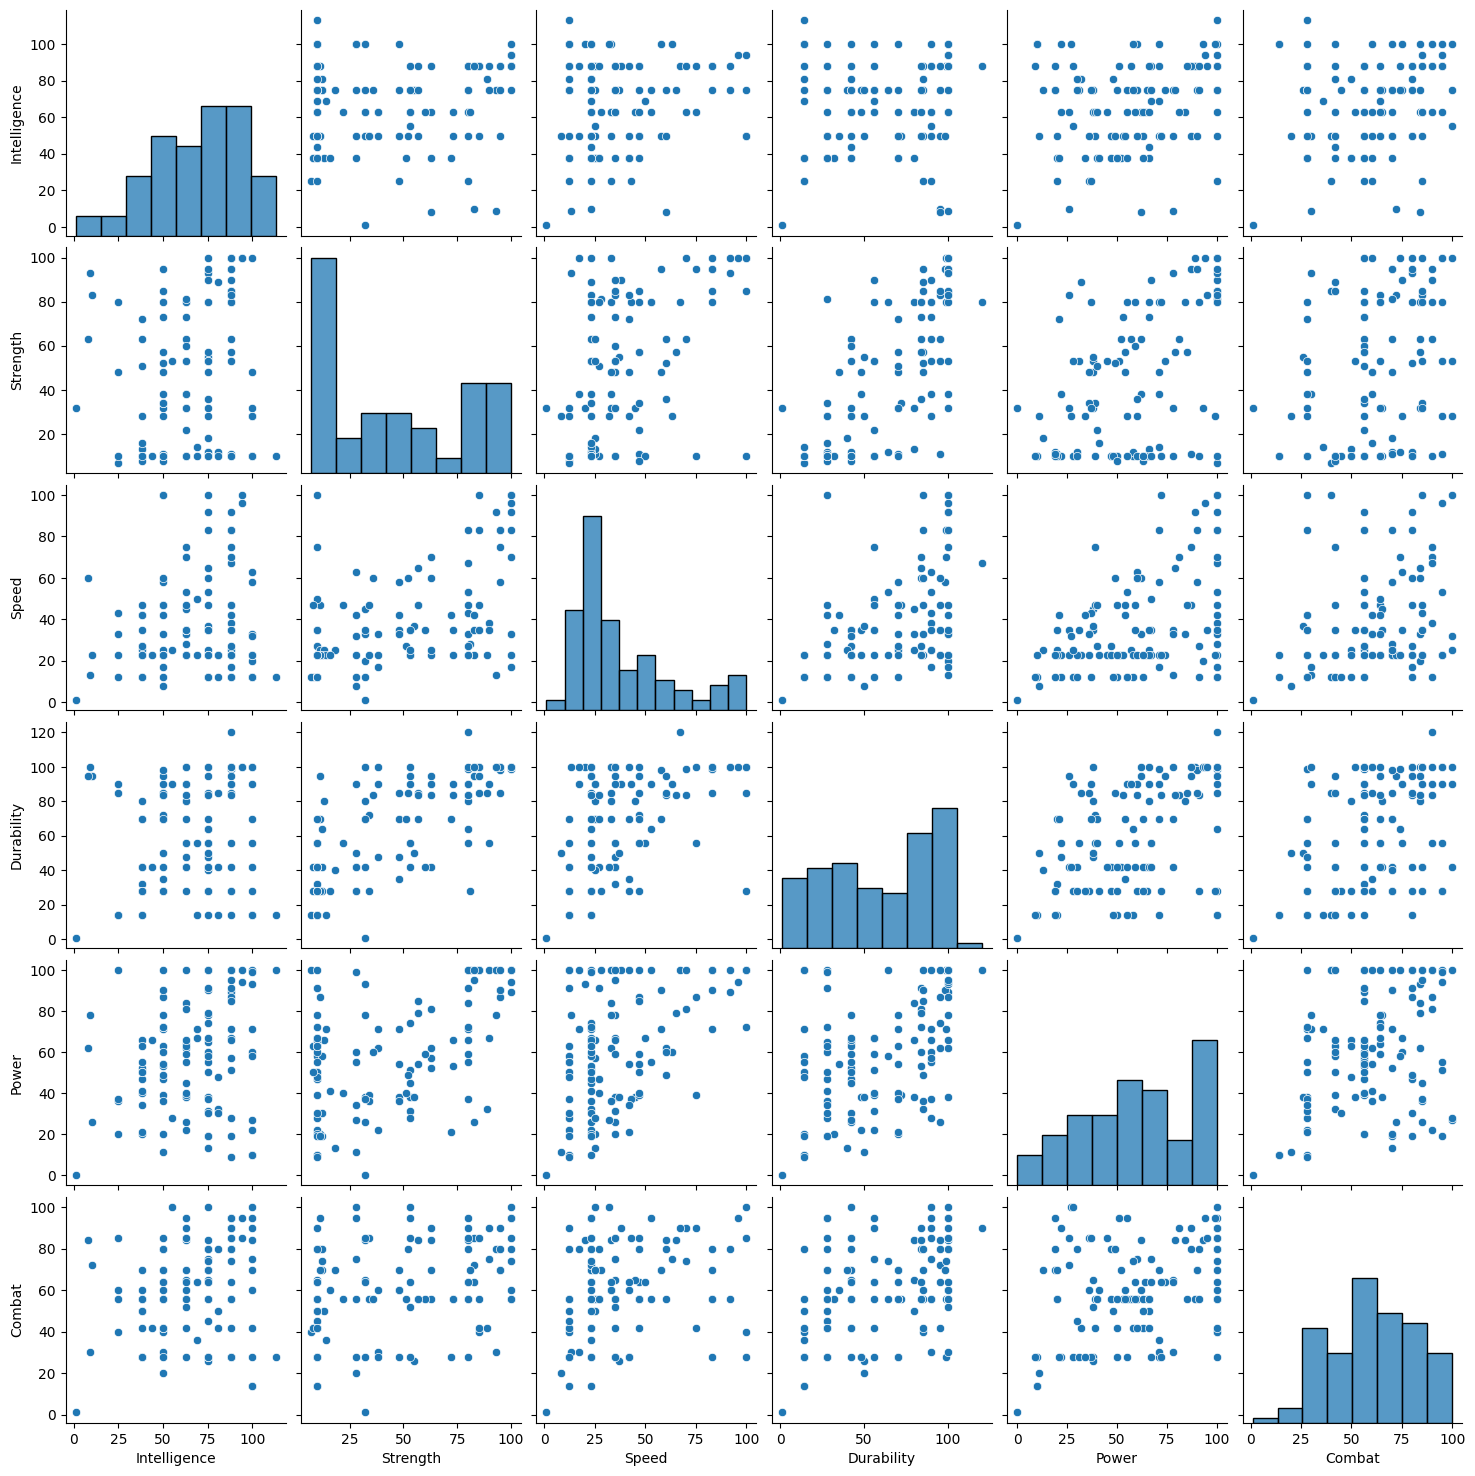

In [29]:
sns.pairplot(data=villains_sans_total)#create a pair plot of the vilians

In [31]:
# Ask the user for a character name
name = input("Enter a character name: ")

#make sure the character name is capitalized
name = name.title()

# Filter the dataframe to get the character's stats
character_stats = df_sans_total.loc[df_sans_total["Name"] == name]

# Check if the character is found in the dataframe
if character_stats.empty:
    print(f"Character \"{name}\" not found in the dataframe")
else:
    # Filter the dataframe to get character's stats
    character_stats = df_sans_total.loc[df_sans_total["Name"] == name]

    # Create a polar plot
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

    sns.barplot(character_stats)

    #add the lables to the plot
    xticklabels = [f"{bar.get_height():.0f}" for bar in ax.containers[0]]
    ax.set_xticklabels([f"INT:{xticklabels[0]}",f"STR:{xticklabels[1]}",f"SPD:{xticklabels[2]}",f"DUR:{xticklabels[3]}",f"POW:{xticklabels[4]}",f"COM:{xticklabels[5]}"])
    ax.set_title(f"{name}'s Stats")
    
    #rotate the plot
    ax.set_theta_zero_location('E')

Character "2" not found in the dataframe
